In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('CarPrice_Assignment.csv')

In [3]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
data.shape

(205, 26)

In [7]:
corr=data.corr(numeric_only=True)

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

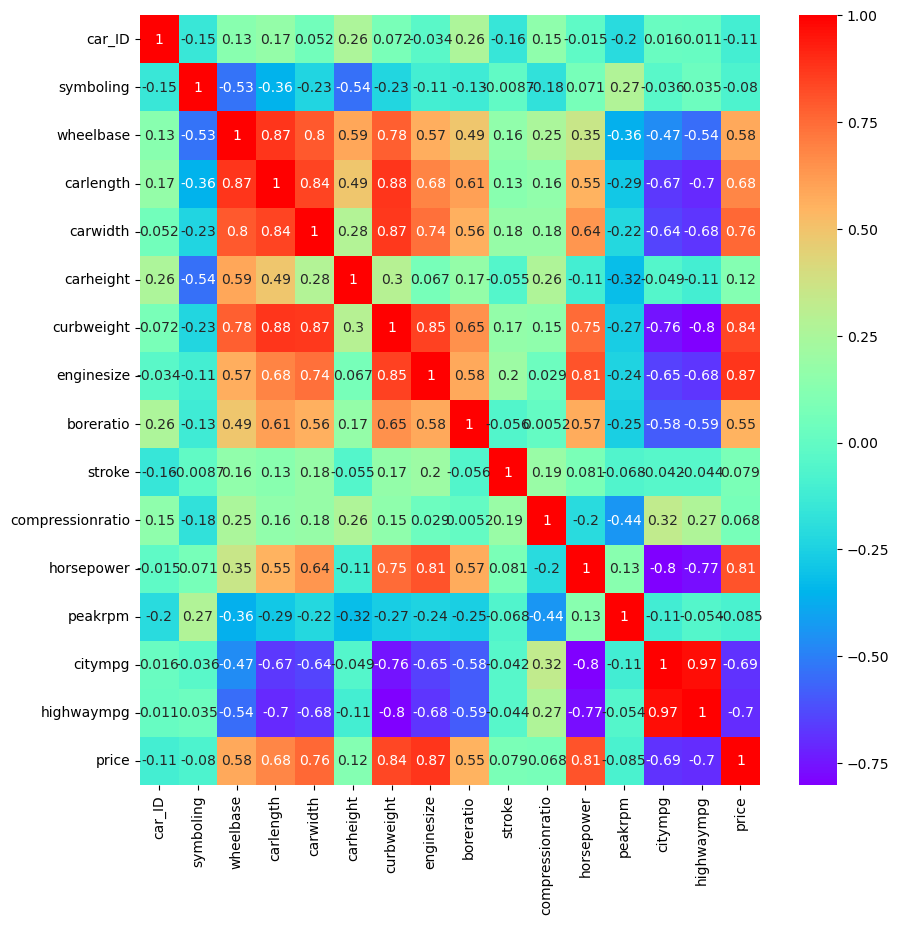

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='rainbow')

In [14]:
numeric_only=data.select_dtypes(include=['float64','int64'])

In [22]:
Q1=numeric_only.quantile(0.25)
Q3=numeric_only.quantile(0.75)
IQR=Q3-Q1

In [23]:
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

In [27]:
# Align the Series with lower_bound and upper_bound along axis 1
lower_bound, upper_bound = lower_bound.align(upper_bound, axis=1)

# Filter outliers based on lower and upper bounds
outlier = data[(data >= lower_bound) & (data <= upper_bound)].dropna()


ValueError: No axis named 1 for object type Series

In [21]:
numeric_only

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [28]:
numeric_only

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [29]:
corr=numeric_only.corr()

<Axes: >

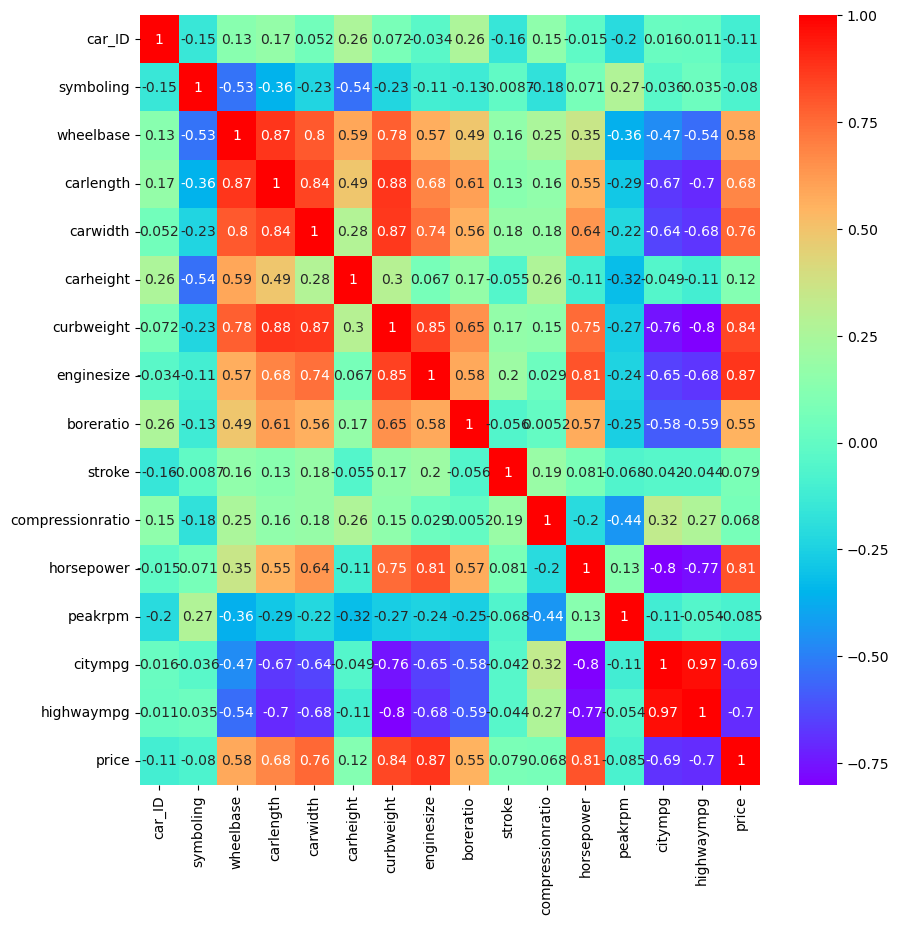

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='rainbow')

In [32]:
x=numeric_only.drop(['price'],axis=1)

In [33]:
y=numeric_only['price']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scalar=StandardScaler()

In [38]:
x_train=scalar.fit_transform(x_train)

In [39]:
x_test=scalar.transform(x_test)

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
from sklearn.linear_model import Ridge

In [42]:
ridge=Ridge()

In [43]:
param_grid={
    'alpha':[0.1,1,10,0.01],
    'max_iter':[10,100,1000]
}

In [44]:
grid_search=GridSearchCV(ridge,param_grid=param_grid,cv=10)

In [45]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 10, 0.01],
                         'max_iter': [10, 100, 1000]})

In [46]:
grid_search.best_params_

{'alpha': 10, 'max_iter': 10}

In [47]:
model=grid_search.best_estimator_

In [48]:
y_pred=model.predict(x_test)

In [49]:
new=pd.DataFrame({
    'varname':x.columns,
    'coefficient':model.coef_
})

In [51]:
new.sort_values(by='coefficient',ascending=False)

,varname,coefficient
7,enginesize,3274.054415
11,horsepower,1511.755165
4,carwidth,1287.297572
6,curbweight,975.381233
10,compressionratio,764.195342
12,peakrpm,631.756912
2,wheelbase,431.767777
1,symboling,403.054399
5,carheight,227.570463
8,boreratio,106.467264


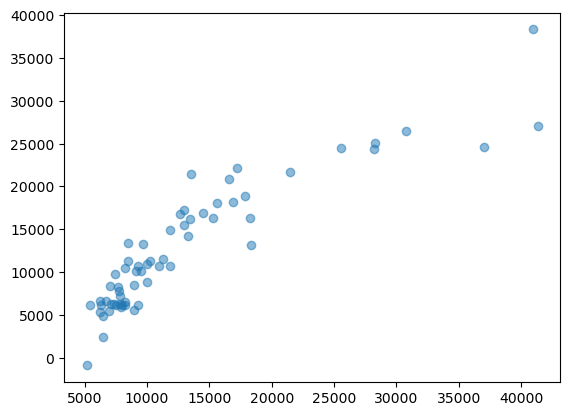

In [52]:
plt.scatter(y_test,y_pred,alpha=0.5)

In [53]:
result=pd.DataFrame({
    'actual':y_test,
    'predicted':y_pred
})

In [54]:
result

,actual,predicted
15,30760.000,26447.202874
9,17859.167,18938.043547
100,9549.000,10188.233414
132,11850.000,14936.835310
68,28248.000,25073.420496
...,...,...
56,11845.000,10732.131359
128,37028.000,24651.924081
76,5389.000,6132.027747
144,9233.000,10679.909805


In [57]:
from sklearn import metrics

In [58]:
metrics.mean_absolute_error(y_test,y_pred)

2472.3300987116963

In [59]:
metrics.explained_variance_score(y_test,y_pred)


0.8179241963953179

In [60]:
metrics.max_error(y_test,y_pred)


14229.279935565588

In [61]:
metrics.mean_squared_error(y_test,y_pred)


12691196.930625992

In [62]:
metrics.r2_score(y_test,y_pred)

0.8168245543222603